## Exploratory Analysis of the Global Findex Database 2017 - Kyrgzystan

Ideas:
* Can benchmark findings in Kyrgzystan with the average of the rest of the Central Asian countries. (https://globalfindex.worldbank.org/sites/globalfindex/files/countrybook/Kyrgyz%20Republic.pdf)

### Context of Data:
1. Mobile phone usage is synonymous with using the Internet in many variables, such as accessing FI account or checking account balances. 
    1. Future data should separate mobile device usage from using the Internet to better understand how mobile adoption is driving usage of financial services.
2. There are 8 recorded answer variables for why individuals don't have accounts with financial institutions.
    1. "No need" is an answer that comes from lack of education of services, or a combination of previous answers. Not helpful information, need to push harder by asking the other questions.
    
### Results


### Next steps


In [14]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os

In [17]:
# Went through documentation to understand all variables, change labels and comment out purpose of each variable.
df.rename(columns={'fin2': 'debit', # have a debit card
                              'fin3' : 'own_debit', # have a debit card under own name
                              'fin4' : 'used_debit', # used debit in past 12 months
                              'fin5' : 'mobile_finance', # used mobile phone/internet to make payment/buy/send money in past 12 months
                              'fin6' : 'mobile_balance', # used mobile phone/internet to check account balance 
                              'fin7' : 'credit', # % have a credit card age 15+
                              'fin8' : 'used_credit', # used credit in past 12 months
                              'fin9' : 'deposit', # deposited in past 12 months
                              'fin10' : 'withdrawal', # withdrawn from account in past 12 months
                              'fin11a' : 'distance_noacct', # no account because FI too far
                              'fin11b' : 'expensive_noacct', # no account because financial services too expensive
                              'fin11c' : 'documentation_noacct', # no account because no documentation 
                              'fin11d' : 'trust_noacct', # no account because don't trust FI
                              'fin11e' : 'religious_noacct', # no account because of religious reasons
                              'fin11f' : 'money_noacct', # no account because not enough money to use services
                              'fin11g' : 'family_noacct', # no account because family already has an account
                              'fin11h' : 'need_noacct', # no account because no need for financial services, 
                              'fin14a' : 'bill_online', # bill payments through the Internet in the past 12 months
                              'fin14b' : 'purchase_online', # online purchase in the past 12 monthsi
                              # 'fin14c' : 'pay_online', # don't know what makes this different from fin14b
                              'fin15' : 'growth_savings', # saved money in past 12 months to grow business/farm
                              'fin16' : 'retirement_savings', # saved money in past 12 months for old age
                              'fin17a' : 'savings_formal', # saved money in past 12 months in FI 
                              'fin17b' : 'savings_informal', # saved money in past 12 months through informally
                              'fin19' : 'loan_formal', # loan taken out from FI in past 12 months
                              'fin20' : 'borrow_medical', # borrowed in past 12 months for health/medical purposes
                              'fin21' : 'borrow_business', # borrowed in past 12 months for business/farm
                              'fin22a' : 'borrow_formal', # borrwowed from FI in the past 12 months 
                              'fin22b' : 'borrow_family', # borrowed from family/friends in past 12 months 
                              'fin22c' : 'borrow_informal', # borrowed from an informal savings club in past 12 months
                              'fin24' : 'emergency', # ability to pay 1/20 of GNI per capita in local currency within next month
                              # 'fin25' : 'emergency_source', # 4 options for the amin source of money to use in order to come up with emergency funds
                              'fin26' : 'dom_remit_sent', # sent domestic remittance in past 12 months 
                              'fin27a' : 'dom_remit_sent_formal', # sent domestic remittance through FI in past 12 months
                              'fin27b' : 'dom_remit_sent_phone', # sent domestic remittance through phone in past 12 months
                              'fin27c1' : 'dom_remit_sent_cash', # sent domestic remittance by cash in past 12 months
                              'fin27c2' : 'dom_remit_sent_mto', # sent domestic remittance through MTS in past 12 months
                              'fin28' : 'dom_remit_rec', # received domestic remittance in past 12 months 
                              'fin29a' : 'dom_remit_rec_formal', # received domestic remittance through FI in past 12 months
                              'fin29b' : 'dom_remit_rec_phone', # received domestic remittance through phone in past 12 months
                              'fin29c1' : 'dom_remit_rec_cash', # received domestic remittance by cash in past 12 months
                              'fin29c2' : 'dom_remit_rec_mto', # received domestic remittance through MTS in past 12 months
                              'fin30' : 'utility', # made regular payments for electricity, water, OR trash over past 12 months
                              'fin31a' : 'utility_formal', # used FI to make utility payment
                              'fin31b' : 'utility_phone', # used phone to make utility payment
                              'fin31c' : 'utility_cash', # used cash to make utility payment
                              'fin32' : 'wages', # received salary/wage from employer, NOT direct money from clients
                              'fin33' : 'wages_public', # is this person a government/public worker?
                              'fin34a' : 'wages_formal', # received wages into a FI account
                              'fin34b' : 'wages_phone', # received wages through a mobile phone 
                              'fin34c1' : 'wages_cash', # received wages in cash
                              'fin34c2' : 'wages_card', # received wages in the form of card payments
                              'fin35' : 'firstacct_cashless_wages', # account used for receiving employer payments is first account
                              'fin36' : 'firstacct_cashless_wages_reason', # was this account opened to receive the wage payments?
                              'fin37' : 'benefits', # social welfare benefits: education/medical expenses, unemployment benefits, subsidy
                              'fin38' : 'pension', # received pension from government/military/public sector
                              'fin39a' : 'pension_formal', # received pension into FI account
                              'fin39b' : 'pension_phone', # received pension through mobile phone
                              'fin39c1' : 'pension_cash', # received pension in cash
                              'fin39c2' : 'pension_card', # received pension in card payments
                              'fin40' : 'firstacct_benefits', # account used for collecting gov payments is first account
                              'fin41' : 'cashless_wages_first_reason', # was this account opened to receive gov benefits payments?
                              'fin42' : 'farm_sales', # received money for sale of agricultural products in past 12 months 
                              'fin43a' : 'farm_formal', # received agri-sales into FI account
                              'fin43b' : 'farm_phone', # received agri-sales through mobile phone
                              'fin43c1' : 'farm_cash', # received agri-sales in cash
                              'fin43c2' : 'farm_card', # received agri-sales in the form of card payments
                              'fin44' : 'firstacct_farm', # account used for collecting agri-sales is first account
                              'fin45' : 'firstacct_farm_reason', # was this account opened to receive the agri-sales payments?
                              'fin46' : 'self_employment', # received money from business/selling goods/services/part-time work 
                              'fin47a' : 'self_employment_formal', # received self-employed money into FI account
                              'fin47b' : 'self_employment_phone', # received self-employed money through mobile phone
                              'fin47c1' : 'self_employment_cash', # received self-employed money in cash
                              'fin47c2' : 'self_employment_card', # received self-employed money via card payments
                              'fin47c3' : 'use_own_debit', # used own debit card directly to make purchase in past 12 months
                              'fin47c4' : 'use_internet_formal_account', # used mobile phone or internet to make payment from FI account
                              'fin47c5' : 'use_internet_formal_checkbalance', # used mobile phone or internet to check account balance
                              'fin48' : 'nationalID'}, inplace=True)

## Breakdown original data set into labeled dataframes for analysis

<b>Limitations</b>: Not able to do a time-series analysis unless we use 2011 and 2014 data sets as well. <br />
<b>Objective</b>: Categorical data analysis

In [18]:
# Filter data frame by only Kyrgyz Republic, total of 1000 rows and 105 columns
# Not able to do a time-series analysis unless I use 2011 and 2014 data sets as well. Practice categorical data analysis 
central_asia_df = df[df['regionwb'] == 'Europe & Central Asia (excluding high income)']
kg_df = df[df['economy'] == "Kyrgyz Republic"]

In [19]:
kg_df.head(1)

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,emp_in,debit,own_debit,used_debit,mobile_finance,mobile_balance,credit,used_credit,deposit,withdrawal,distance_noacct,expensive_noacct,documentation_noacct,trust_noacct,religious_noacct,money_noacct,family_noacct,need_noacct,bill_online,purchase_online,fin14c,growth_savings,retirement_savings,savings_formal,savings_informal,loan_formal,borrow_medical,borrow_business,borrow_formal,borrow_family,borrow_informal,emergency,fin25,dom_remit_sent,dom_remit_sent_formal,dom_remit_sent_phone,dom_remit_sent_cash,dom_remit_sent_mto,dom_remit_rec,dom_remit_rec_formal,dom_remit_rec_phone,dom_remit_rec_cash,dom_remit_rec_mto,utility,utility_formal,utility_phone,utility_cash,wages,wages_public,wages_formal,wages_phone,wages_cash,wages_card,firstacct_cashless_wages,firstacct_cashless_wages_reason,benefits,pension,pension_formal,pension_phone,pension_cash,pension_card,firstacct_benefits,cashless_wages_first_reason,farm_sales,farm_formal,farm_phone,farm_cash,farm_card,firstacct_farm,firstacct_farm_reason,self_employment,self_employment_formal,self_employment_phone,self_employment_cash,self_employment_card,use_own_debit,use_internet_formal_account,use_internet_formal_checkbalance,mobileowner,nationalID,account_fin,account_mob,account,saved,borrowed,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,pay_onlne,pay_onlne_mobintbuy,pay_cash,pay_cash_mobintbuy
72963,Kyrgyz Republic,KGZ,Europe & Central Asia (excluding high income),4165726.5,118026217,1.847031,1,33.0,2.0,4,1.0,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2,NaN,2,2,2,2.0,2,2,2,2,1,NaN,1,2.0,1.0,2.0,1.0,NaN,NaN,1.0,2.0,2.0,1.0,2.0,1,2.0,2.0,2.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0,0.0,0,0,1,4,4,4,2.0,3,2.0,0.0,NaN,0.0,NaN


## Split original dataframe to look at specific behaviors of Kyrgyz user


In [20]:
# Basic financial services usage for credit and debit transactions
basic_account_usage = kg_df.loc[:,'female':'withdrawal']
basic_account_usage.head()

,female,age,educ,inc_q,emp_in,debit,own_debit,used_debit,mobile_finance,mobile_balance,credit,used_credit,deposit,withdrawal
72963,1,33.0,2.0,4,1.0,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
72964,1,19.0,2.0,1,1.0,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
72965,1,59.0,2.0,3,0.0,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
72966,1,52.0,3.0,2,1.0,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
72967,1,48.0,2.0,5,1.0,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN


## Debit analysis 
* Though debit account adoption rate across Central Asia is ~2x adoption in Kyrgyzstan, debit card usage rate is ~4x.

In [132]:
# Picked the female column because it is one of the few columns that where count is 1000
debit_adoption = len(basic_account_usage[basic_account_usage['own_debit'] == 1]) / basic_account_usage['female'].count()*100
debit_usage = len(basic_account_usage[basic_account_usage['used_debit'] == 1]) / basic_account_usage['female'].count()*100
print(str(round(debit_adoption, 2)) + "% of people have a debit card under their own name")
print(str(round(debit_usage, 2)) + str("% of people have used a debit transaction in the past 12 months"))

21.0% of people have a debit card under their own name
5.7% of people have used a debit transaction in the past 12 months


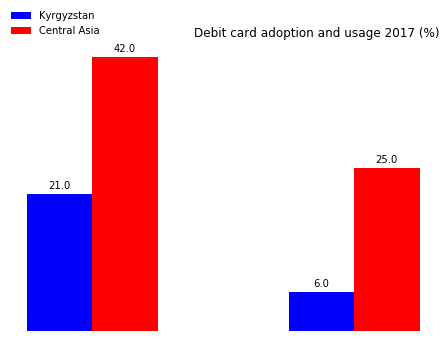

In [133]:
# Compare debit adoption rate to other Central Asian countries and to high-income countries
ca_debit_adoption = len(central_asia_df[central_asia_df['own_debit'] == 1]) / central_asia_df['female'].count()*100
ca_debit_usage = len(central_asia_df[central_asia_df['used_debit'] == 1]) / central_asia_df['female'].count()*100

ca_debit = [ca_debit_adoption.round(0), ca_debit_usage.round(0)]
kg_debit = [debit_adoption.round(0), debit_usage.round(0)]
# labels = ['Own a debit card', 'Used a debit card in past 12 months']

X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Debit card adoption and usage 2017 (%)', loc='right')
rect1 = ax.bar(X + 0.00, kg_debit, color = 'b', width = 0.25, label = 'Kyrgyzstan')
rect2 = ax.bar(X + 0.25, ca_debit, color = 'r', width = 0.25, label = 'Central Asia')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=1,
            borderaxespad=0, frameon=False)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rect1)
autolabel(rect2)

## Savings analysis
* Dropped rows where people save both informally and formally to isolate the behavioral differences between those that save and those that don't save.
* Those that do save formally are more likely to save for retirement and for growing a business.
* Most people that save pay for housing/utilities and keep an emergency fund. 

</br> Hypothesis: People that use formal financial instutitions are exposed to services that will growth their wealth.

In [115]:
debit_savings = kg_df.filter(items=['own_debit', 'used_debit', 'growth_savings', 'retirement_savings', 'savings_formal', 'savings_informal'])
savings_df = debit_savings[(debit_savings['savings_informal'] == 1) | (debit_savings['savings_formal'] == 1) | (debit_savings['retirement_savings'] == 1) | (debit_savings['growth_savings'] == 1)]
# print(str((len(savings_df) / len(debit_savings)) * 100) + "% of Kyrgyz people have saved in the past 12 months")

debit_savings['debit'] = np.where(debit_savings['own_debit'] == 1, 1, 0)

conditions = [
    (debit_savings['savings_informal'] == 1) | (debit_savings['savings_formal'] == 1),
    (debit_savings['savings_informal'] != 1) | (debit_savings['savings_formal'] != 1)
]

choices = [
    1, 0
]

debit_savings['savings'] = np.select(conditions, choices)
debit_savings['savings_informal'].value_counts()

# Drop rows where people save both informally and formally.
debit_savings[(debit_savings['savings_informal'] == 1) & (debit_savings['savings_formal'] == 1)]
debit_savings = debit_savings.drop([73066, 73204, 73207, 73223, 73247, 73325, 73329, 73687, 73705, 73814, 73882, 73949, 73950])

# Pool of those that only save informally is 63 people.
len(debit_savings[(debit_savings['savings_informal'] == 1)])
growth_d = len(debit_savings[(debit_savings['savings_informal'] == 1) & (debit_savings['growth_savings'] == 1)])
retire_d = len(debit_savings[(debit_savings['savings_informal'] == 1) & (debit_savings['retirement_savings'] == 1)])
print(str(round(growth_d / len(debit_savings[(debit_savings['savings_informal'] == 1)]) * 100, 2)) + "% of people that save informally use savings to grow a business or farm.")
print(str(round(retire_d / len(debit_savings[(debit_savings['savings_informal'] == 1)]) * 100, 2)) + "% of people that save informally use savings for old age.")

# Pool of those that only save formally is 28 people.
len(debit_savings[(debit_savings['savings_formal'] == 1)])
growth_s = len(debit_savings[(debit_savings['savings_formal'] == 1) & (debit_savings['growth_savings'] == 1)])
retire_s = len(debit_savings[(debit_savings['savings_formal'] == 1) & (debit_savings['retirement_savings'] == 1)])
print(str(round(growth_s / len(debit_savings[(debit_savings['savings_formal'] == 1)]) * 100, 2)) + "% of people that save formally use savings to grow a business or farm.")
print(str(round(retire_s / len(debit_savings[(debit_savings['savings_formal'] == 1)]) * 100, 2)) + "% of people that save formally use savings for old age.")

20.63% of people that save informally use savings to grow a business or farm.
7.94% of people that save informally use savings for old age.
46.43% of people that save formally use savings to grow a business or farm.
17.86% of people that save formally use savings for old age.
